# Загрузка библиотек и датасета

In [37]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
from PIL import Image
from brisque import BRISQUE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import gc

In [3]:
df = pd.read_pickle('../data/common_files/df_markup.pkl')

# Laplacian Var

## Определение качества фото

In [27]:
def check_photo_quality_laplacian(image_path):
    gray_image = Image.open(image_path).convert('L')
    laplacian_var = cv2.Laplacian(np.array(gray_image), cv2.CV_64F).var()
    return laplacian_var

In [28]:
qualities = []
for file in tqdm(df['file_name']):
    qualities.append(check_photo_quality_laplacian(file))
df['quality_laplacian'] = qualities

100%|██████████| 8512/8512 [05:07<00:00, 27.71it/s]


## Расчет порога приемлемого качества фотографии

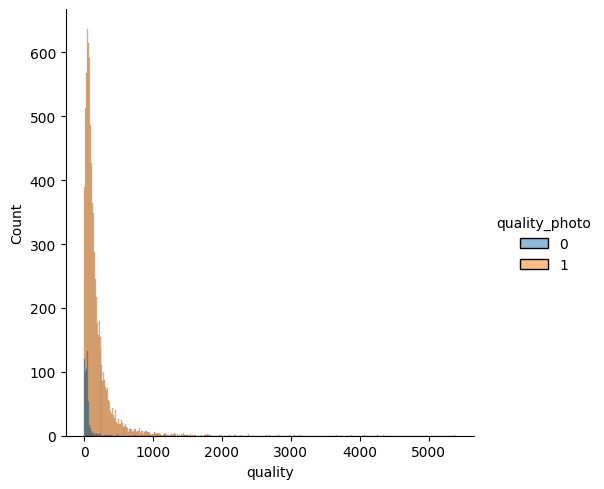

In [32]:
sns.displot(data=df, x="quality_laplacian", hue="quality_photo")

In [49]:
thresholds = np.linspace(df['quality_laplacian'].min(), df['quality_laplacian'].max(), 1000)
tnrs, fnrs, tns, fns = [], [], [], []
for threshold in tqdm(thresholds):
    laplacian_pred = (df['quality_laplacian'] > threshold).astype(int)
    cm = confusion_matrix(df['quality_photo'], laplacian_pred)
    tn = cm[0, 0]
    tns.append(tn)
    tn_rate = tn / (tn + cm[0, 1])
    tnrs.append(tn_rate)
    fn = cm[1, 0]
    fns.append(fn)
    fn_rate = fn / (fn + cm[1, 1])
    fnrs.append(fn_rate)

100%|██████████| 1000/1000 [00:00<00:00, 1733.00it/s]


<AxesSubplot:xlabel='threshold'>

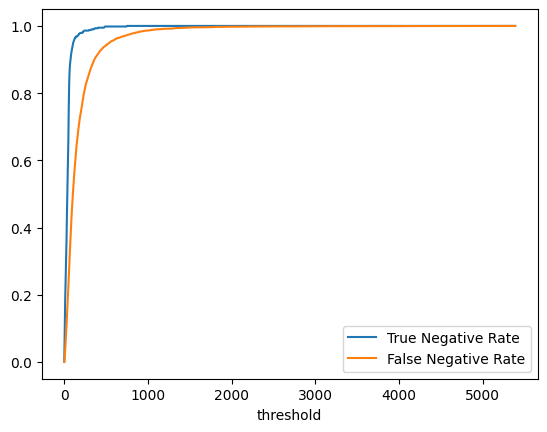

In [50]:
pd.DataFrame(
    {
        'threshold': thresholds,
        'True Negative Rate': tnrs,
        'False Negative Rate': fnrs
    }
).set_index('threshold').plot()

<AxesSubplot:xlabel='threshold'>

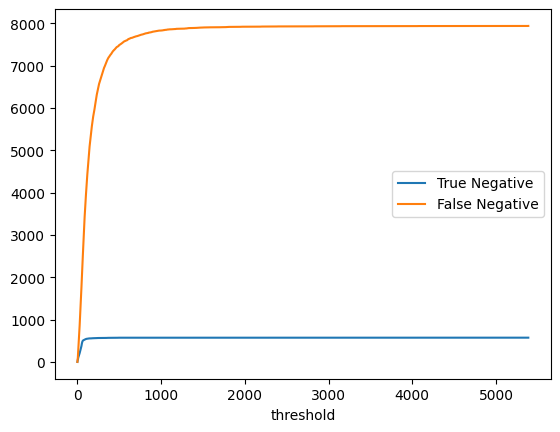

In [51]:
pd.DataFrame(
    {
        'threshold': thresholds,
        'True Negative': tns,
        'False Negative': fns
    }
).set_index('threshold').plot()

In [59]:
np.diff(tns)[:15]

array([59, 46, 34, 42, 27, 48, 36, 44, 40, 61, 42, 21, 10,  6,  8],
      dtype=int64)

In [60]:
np.where(np.diff(tns) == 10)

(array([12], dtype=int64),)

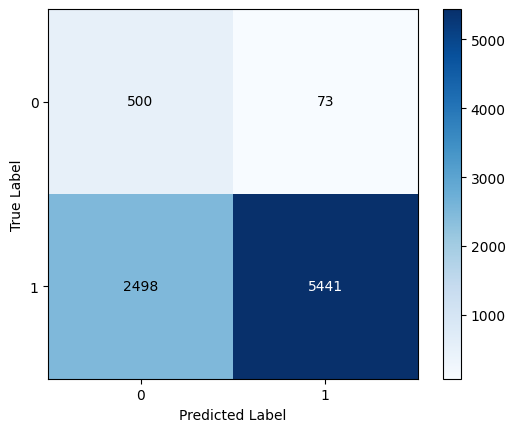

In [66]:
laplacian_pred = (df['quality_laplacian'] > thresholds[12]).astype(int)
cm = confusion_matrix(df['quality_photo'], laplacian_pred)
tn = cm[0, 0]
tn_rate = tn / (tn + cm[0, 1])
fn = cm[1, 0]
fn_rate = fn / (fn + cm[1, 1])

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
num_classes = 2
# Add labels and ticks to the plot
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the values to the plot
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, int(cm[i, j]),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()

Способ не рабочий :(

# Image Noise

In [68]:
def check_photo_quality_image_noise(image_path):
    gray_image = Image.open(image_path).convert('L')
    noise = np.mean((gray_image - np.mean(gray_image))**2)
    return noise

In [69]:
qualities = []
for file in tqdm(df['file_name']):
    qualities.append(check_photo_quality_image_noise(file))
df['quality_image_noise'] = qualities

100%|██████████| 8512/8512 [09:07<00:00, 15.53it/s]  


## Расчет порога приемлемого качества фотографии

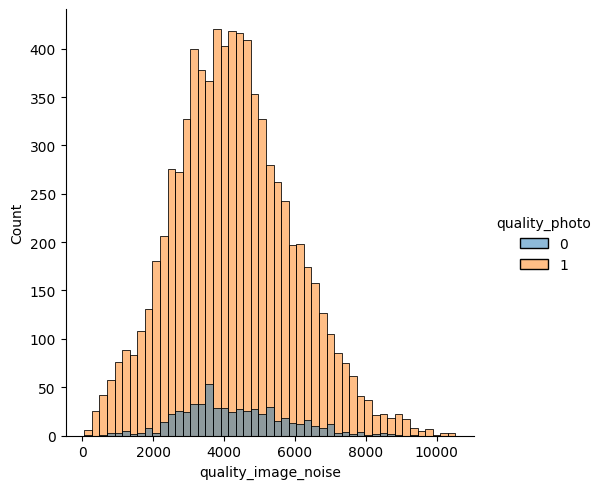

In [70]:
sns.displot(data=df, x="quality_image_noise", hue="quality_photo")

In [71]:
thresholds = np.linspace(df['quality_image_noise'].min(), df['quality_image_noise'].max(), 1000)
tnrs, fnrs, tns, fns = [], [], [], []
for threshold in tqdm(thresholds):
    imagenoise_pred = (df['quality_image_noise'] > threshold).astype(int)
    cm = confusion_matrix(df['quality_photo'], imagenoise_pred)
    tn = cm[0, 0]
    tns.append(tn)
    tn_rate = tn / (tn + cm[0, 1])
    tnrs.append(tn_rate)
    fn = cm[1, 0]
    fns.append(fn)
    fn_rate = fn / (fn + cm[1, 1])
    fnrs.append(fn_rate)

100%|██████████| 1000/1000 [00:01<00:00, 777.62it/s]


<AxesSubplot:xlabel='threshold'>

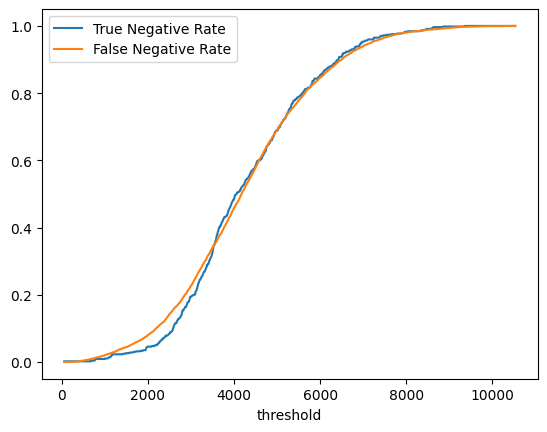

In [72]:
pd.DataFrame(
    {
        'threshold': thresholds,
        'True Negative Rate': tnrs,
        'False Negative Rate': fnrs
    }
).set_index('threshold').plot()

<AxesSubplot:xlabel='threshold'>

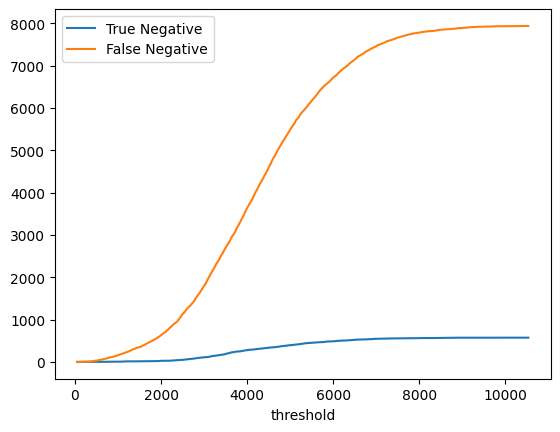

In [73]:
pd.DataFrame(
    {
        'threshold': thresholds,
        'True Negative': tns,
        'False Negative': fns
    }
).set_index('threshold').plot()

In [76]:
np.diff(tns)[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Метод нерабочий :(

# Saturation

## Определение качества фото

In [ ]:
def check_photo_quality_image_noise(image_path):
    gray_image = Image.open(image_path).convert('L')
    noise = np.mean((gray_image - np.mean(gray_image))**2)
    return noise

In [87]:
def check_photo_quality_saturation(image_path):
    img = Image.open(image_path)
    hsv = np.array(img.convert("HSV"))
    saturation = np.mean(hsv[:,:,1])
    return saturation

In [88]:
qualities = []
for file in tqdm(df['file_name']):
    qualities.append(check_photo_quality_saturation(file))
df['quality_saturation'] = qualities

100%|██████████| 8512/8512 [14:48<00:00,  9.58it/s]


## Расчет порога приемлемого качества фотографии

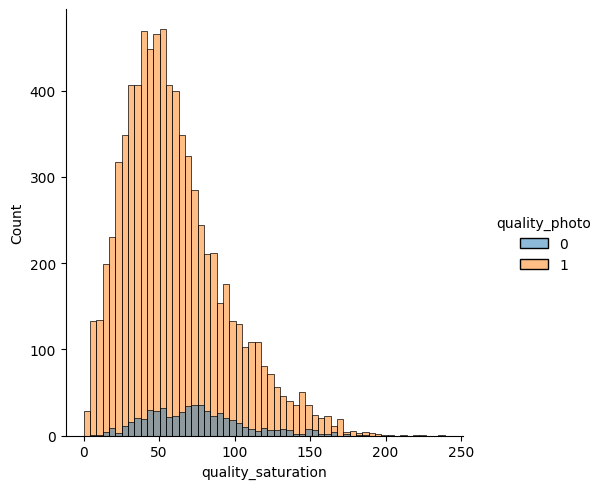

In [89]:
sns.displot(data=df, x="quality_saturation", hue="quality_photo")

In [90]:
thresholds = np.linspace(df['quality_saturation'].min(), df['quality_saturation'].max(), 1000)
tnrs, fnrs, tns, fns = [], [], [], []
for threshold in tqdm(thresholds):
    laplacian_pred = (df['quality_saturation'] > threshold).astype(int)
    cm = confusion_matrix(df['quality_photo'], laplacian_pred)
    tn = cm[0, 0]
    tns.append(tn)
    tn_rate = tn / (tn + cm[0, 1])
    tnrs.append(tn_rate)
    fn = cm[1, 0]
    fns.append(fn)
    fn_rate = fn / (fn + cm[1, 1])
    fnrs.append(fn_rate)

100%|██████████| 1000/1000 [00:01<00:00, 784.61it/s]


<AxesSubplot:xlabel='threshold'>

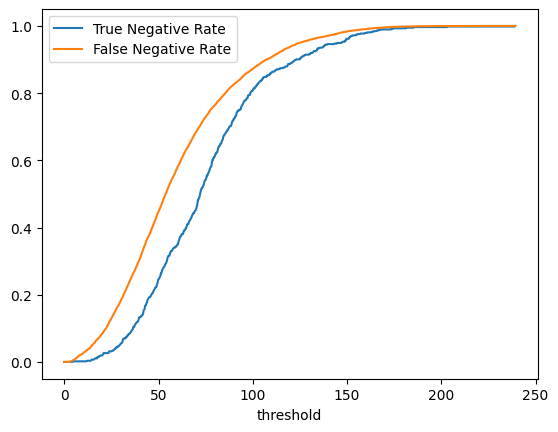

In [91]:
pd.DataFrame(
    {
        'threshold': thresholds,
        'True Negative Rate': tnrs,
        'False Negative Rate': fnrs
    }
).set_index('threshold').plot()

<AxesSubplot:xlabel='threshold'>

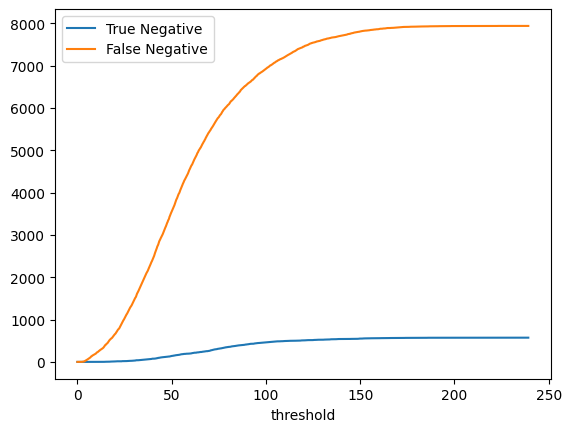

In [92]:
pd.DataFrame(
    {
        'threshold': thresholds,
        'True Negative': tns,
        'False Negative': fns
    }
).set_index('threshold').plot()

In [93]:
np.diff(tns)[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# CatBoost with ['quality_laplacian', 'quality_image_noise', 'quality_saturation'] as features

In [97]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [98]:
# Define the feature columns
feature_columns = ['quality_laplacian', 'quality_image_noise', 'quality_saturation']

# Define the target column
target_column = 'quality_photo'

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df[target_column], test_size=0.2, random_state=42)

In [99]:
# Create a CatBoost classifier
model = CatBoostClassifier()
# Train the model on the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
# Make predictions on the test set
y_pred = model.predict(X_test)

C:\Users\dimaz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


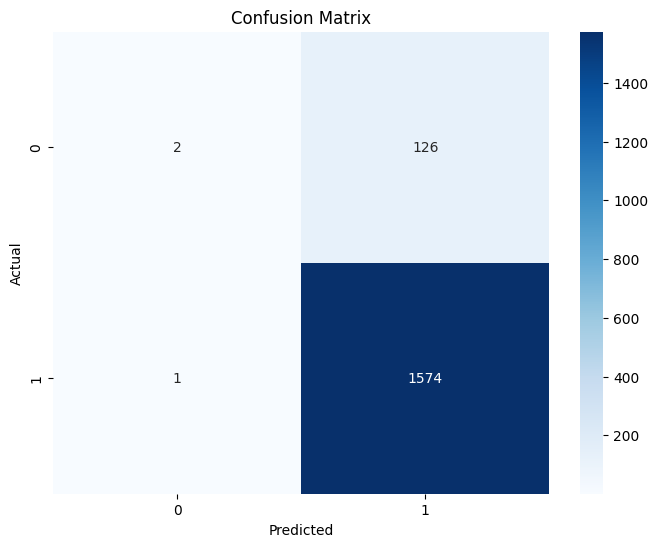

In [100]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.9254257193188491


# Brisque

In [5]:
def check_photo_quality_brisque(image_path):
    img = Image.open(image_path)
    obj = BRISQUE(url=False)
    return obj.score(np.array(img))

In [8]:
brisques = []
for file in tqdm(df['file_name']):
    brisques.append(check_photo_quality_brisque(file))

 16%|█▌        | 1373/8512 [43:03<3:43:55,  1.88s/it]


FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\sorted_data_merged\\garbage\\│Ч│Э│Ю0301517495_TS903153561-7538c48b-d0a1-4a43-b430-9dce077b3228.jpg'

In [21]:
df_corr = pd.DataFrame(
    {
        'target': df['quality_photo'][:len(brisques)],
        'brisque': brisques
     }
)
df_corr.corr()

,target,brisque
target,1.000000,-0.541557
brisque,-0.541557,1.000000


# Neural Network

In [50]:
from torchvision import datasets, transforms
from sklearn.metrics import f1_score
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

In [34]:
df_nn = df[['file_name', 'quality_photo']]
X_train, X_test, y_train, y_test = train_test_split(
    df_nn['file_name'], df_nn['quality_photo'], stratify=df_nn['quality_photo']
)

In [41]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

class CustomDataset(Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img_path = self.X[idx]
        label = self.Y[idx]

        img = Image.open(img_path).convert("RGB")
        # Preprocess the image if needed (e.g., resize, normalize)
        if self.transform:
            img = self.transform(img)
        return img, label

In [42]:
train_dataset = CustomDataset(X_train, y_train, transform=data_transform)
test_dataset = CustomDataset(X_test, y_test)

batch_size = 32
shuffle = True  # Set to False if you want to keep the order
num_workers = 4  # Number of subprocesses for data loading

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [43]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies, train_f1s, test_f1s):
    clear_output()
    fig, axs = plt.subplots(1, 3, figsize=(20, 10))
    plt.rcParams['font.size'] = '12'
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    axs[2].plot(range(1, len(train_f1s) + 1), train_f1s, label='train')
    axs[2].plot(range(1, len(test_f1s) + 1), test_f1s, label='test')
    axs[2].set_ylabel('F1')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [46]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [48]:
def training_epoch(model, optimizer, criterion, train_loader, tqdm_desc):
    train_loss, train_accuracy, f1_score_value = 0.0, 0.0, 0.0
    model.train()
    for images, labels in tqdm(train_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size

        optimizer.zero_grad()
        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.shape[0]
        train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        # Calculate F1-score
        predictions = logits.argmax(dim=1)
        f1_score_value += f1_score(labels.cpu().numpy(), predictions.cpu().numpy(), average='macro')
    
    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    f1_score_value /= len(train_loader)
    
    return train_loss, train_accuracy, f1_score_value


@torch.no_grad()
def validation_epoch(model, criterion, test_loader, tqdm_desc):
    test_loss, test_accuracy, test_f1 = 0.0, 0.0, 0.0
    model.eval()
    for images, labels in tqdm(test_loader, desc=tqdm_desc):
        images = images.to(device)  # images: batch_size x num_channels x height x width
        labels = labels.to(device)  # labels: batch_size
        logits = model(images)  # logits: batch_size x num_classes
        loss = criterion(logits, labels)

        test_loss += loss.item() * images.shape[0]
        test_accuracy += (logits.argmax(dim=1) == labels).sum().item()
        # Calculate F1-score
        predictions = logits.argmax(dim=1)
        test_f1 += f1_score(labels.cpu().numpy(), predictions.cpu().numpy(), average='macro')

    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    test_f1 /= len(test_loader)

    return test_loss, test_accuracy, test_f1

    
def train(model, optimizer, scheduler, criterion, train_loader, test_loader, num_epochs):
    train_losses, train_accuracies, train_f1s = [], [], []
    test_losses, test_accuracies, test_f1s = [], [], []

    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy, train_f1 = training_epoch(
            model, optimizer, criterion, train_loader,
            tqdm_desc=f'Training {epoch}/{num_epochs}'
        )
        test_loss, test_accuracy, test_f1 = validation_epoch(
            model, criterion, test_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        if scheduler is not None:
            scheduler.step()

        train_losses += [train_loss]
        train_accuracies += [train_accuracy]
        train_f1s += [train_f1]
        test_losses += [test_loss]
        test_accuracies += [test_accuracy]
        test_f1s += [test_f1]
        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies, train_f1s, test_f1s)

    return train_losses, test_losses, train_accuracies, test_accuracies, train_f1s, test_f1s

In [51]:
num_epochs = 10

model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
# Заменяем исходную голову модели на голову с правильным числом классов
model.classifier[1] = torch.nn.Linear(1280, 2)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

In [54]:
train_losses, test_losses, train_accuracies, test_accuracies, train_f1s, test_f1s = train(
    model, optimizer, scheduler, criterion, train_dataloader, test_dataloader, num_epochs
)

Training 1/10:   0%|          | 0/200 [00:00<?, ?it/s]